# Internship number - DS2312

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Data_train.xlsx')
df_test = pd.read_excel('Data_test.xlsx')

In [3]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [5]:
df.duplicated().sum()

25

In [6]:
df.drop_duplicates(inplace=True)

<AxesSubplot:>

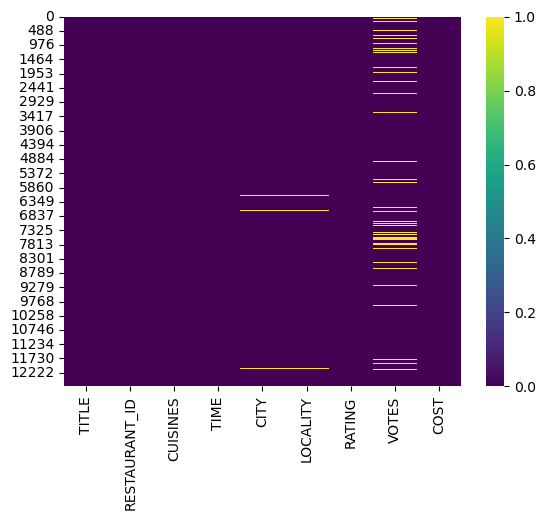

In [7]:
sns.heatmap(df.isna(),cmap='viridis')

In [8]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

In [9]:
df.VOTES.fillna('0 votes',inplace=True)

In [10]:
df[df.RATING.isna()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
204,BAKERY,15062,Bakery,Not Available,Kochi,Marine Drive,NaN,0 votes,200
421,CAFÉ,14127,"Cafe, Fast Food",Not Available,Hyderabad,Banjara Hills,NaN,0 votes,350


In [11]:
df['votes'] = df['VOTES'].str.split().str[0].astype(float)

In [12]:
df.drop(['VOTES','LOCALITY','RESTAURANT_ID'],axis=1,inplace = True)

In [13]:
df.RATING = pd.to_numeric(df['RATING'],errors='coerce')
df.RATING.fillna(0,inplace=True)

In [14]:
bins = [0, 1, 2, 3, 4, 5] 
labels = ['0-1', '1-2', '2-3', '3-4', '4-5'] 

df['ratings'] = pd.cut(df['RATING'], bins=bins, labels=labels, right=False)

In [15]:
df.drop(['RATING'],axis=1,inplace=True)

In [39]:
df.CITY.unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', nan, 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to

In [69]:
#pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', None)

In [82]:
df.CITY.value_counts()

Bangalore                                                                         2189
Chennai                                                                           2173
Mumbai                                                                            1897
Hyderabad                                                                         1819
New Delhi                                                                         1317
Kochi                                                                             1278
Gurgaon                                                                            377
Secunderabad                                                                       310
Noida                                                                              211
Ghaziabad                                                                          102
Thane                                                                               95
Faridabad                                  

In [16]:
cuisine = df['CUISINES'].str.split(',', expand=True)

In [17]:
title = df['TITLE'].str.split(',', expand=True)
column_mapping = {
    0: 'title1',
    1: 'title2',}

title.rename(columns=column_mapping, inplace=True)

In [18]:
df = pd.concat([df,title,cuisine],axis=1)

In [19]:
df.drop(['TITLE','CUISINES'],axis=1,inplace = True)

In [20]:
df.head()

,TIME,CITY,COST,votes,ratings,title1,title2,0,1,2,3,4,5,6,7
0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,1200,49.0,3-4,CASUAL DINING,None,Malwani,Goan,North Indian,None,None,None,None,None
1,6pm – 11pm (Mon-Sun),Chennai,1500,30.0,4-5,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None,None,None,None,None
2,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,800,221.0,3-4,CASUAL DINING,None,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None
3,11:30am – 1am (Mon-Sun),Mumbai,800,24.0,4-5,QUICK BITES,None,Tibetan,Chinese,None,None,None,None,None,None
4,11am – 1am (Mon-Sun),Mumbai,300,165.0,3-4,DESSERT PARLOR,None,Desserts,None,None,None,None,None,None,None


In [21]:
import re
def split_and_remove_days(value):
    parts = []
    parentheses_depth = 0
    current_part = ""
    for char in value:
        if char == '(':
            parentheses_depth += 1
        elif char == ')':
            parentheses_depth -= 1
        elif char == ',' and parentheses_depth == 0:
            current_part = re.sub(r'\b(Mon|Tue|Wed|Thu|Fri|Sat|Sun)\b', '', current_part)
            parts.append(current_part.strip())
            current_part = ""
        else:
            current_part += char
    current_part = re.sub(r'\b(Mon|Tue|Wed|Thu|Fri|Sat|Sun)\b', '', current_part)
    parts.append(current_part.strip())
    return parts

df['time'] = df['TIME'].apply(split_and_remove_days)

max_columns = max(df['time'].apply(len))
for i in range(max_columns):
    df[f'time{i+1}'] = df['time'].apply(lambda x: x[i] if len(x) > i else None)

df.drop('time', axis=1, inplace=True)

In [22]:
def replace_values(value):
    if pd.isnull(value):
        return 0
    else:
        return 1
df['time1'] = df['time1'].apply(replace_values)
df['time2'] = df['time2'].apply(replace_values)
df['time3'] = df['time3'].apply(replace_values)

In [23]:
df.drop(['TIME'],axis=1,inplace = True)

In [24]:
df.CITY.dropna(inplace=True)

In [31]:
df.CITY.value_counts()

Bangalore    2187
Chennai      2173
Mumbai       2140
Hyderabad    2129
Delhi NCR    2117
Kochi        1278
Name: CITY, dtype: int64

In [25]:
df.dropna(subset=['CITY'],inplace=True)

In [27]:
df['CITY'] = df['CITY'].str.replace(r'.*Mumbai.*', 'Mumbai', regex=True)
df['CITY'] = df['CITY'].str.replace(r'.*Chennai.*', 'Chennai', regex=True)
df['CITY'] = df['CITY'].str.replace(r'.*Delhi.*', 'Delhi', regex=True)
df['CITY'] = df['CITY'].str.replace(r'.*Bangalore.*', 'Bangalore', regex=True)
df['CITY'] = df['CITY'].str.replace(r'.*Mumbai.*', 'Mumbai', regex=True)
df['CITY'] = df['CITY'].str.replace(r'.*Kerala.*', 'Kochi', regex=True)
df['CITY'] = df['CITY'].str.replace(r'.*Kochi.*', 'Kochi', regex=True)
df['CITY'] = df['CITY'].str.replace(r'.*Hyderabad.*', 'Hyderabad', regex=True)

In [28]:
df['CITY'] = df['CITY'].str.replace(r'(Andheri West|Thane West|Bandra West|Thane)', 'Mumbai', regex=True)
df['CITY'] = df['CITY'].str.replace(r'(Ghaziabad|Greater Noida|Gurgaon|Faridabad|Delhi NCR|Noida)', 'Delhi NCR', regex=True)
df['CITY'] = df['CITY'].str.replace(r'(Secunderabad|Hyderabad)', 'Hyderabad', regex=True)

In [29]:
df['CITY'] = df['CITY'].str.replace(r'^\s*Delhi\s*$', 'Delhi NCR', regex=True)
df['CITY'] = df['CITY'].str.replace(r'^\s*Delhi NCR\s*$', 'Delhi NCR', regex=True)

In [30]:
bangalore_pattern = re.compile(r'Bangalore|Bengaluru|Karnataka|Banglaore|Bangalore.*')

df['CITY'] = df['CITY'].str.replace(bangalore_pattern, 'Bangalore', regex=True)

In [26]:
v_counts = df['CITY'].value_counts()

x = v_counts[v_counts < 30].index

df = df[~df['CITY'].isin(x)]

In [35]:
df.head()

,CITY,COST,votes,ratings,title1,title2,0,1,2,3,4,5,6,7,time1,time2,time3
0,Mumbai,1200,49.0,3-4,CASUAL DINING,None,Malwani,Goan,North Indian,None,None,None,None,None,1,1,0
1,Chennai,1500,30.0,4-5,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,None,None,None,None,None,1,0,0
2,Chennai,800,221.0,3-4,CASUAL DINING,None,North Indian,Chinese,Biryani,Hyderabadi,None,None,None,None,1,1,0
3,Mumbai,800,24.0,4-5,QUICK BITES,None,Tibetan,Chinese,None,None,None,None,None,None,1,0,0
4,Mumbai,300,165.0,3-4,DESSERT PARLOR,None,Desserts,None,None,None,None,None,None,None,1,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12136 entries, 0 to 12689
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CITY     12024 non-null  object  
 1   COST     12136 non-null  int64   
 2   votes    12136 non-null  float64 
 3   ratings  12136 non-null  category
 4   title1   12136 non-null  object  
 5   title2   1428 non-null   object  
 6   0        12136 non-null  object  
 7   1        9220 non-null   object  
 8   2        5453 non-null   object  
 9   3        2585 non-null   object  
 10  4        964 non-null    object  
 11  5        394 non-null    object  
 12  6        165 non-null    object  
 13  7        73 non-null     object  
 14  time1    12136 non-null  int64   
 15  time2    12136 non-null  int64   
 16  time3    12136 non-null  int64   
dtypes: category(1), float64(1), int64(4), object(11)
memory usage: 1.6+ MB


In [33]:
df.tail()

,CITY,COST,votes,ratings,title1,title2,0,1,2,3,4,5,6,7,time1,time2,time3
12685,Hyderabad,500,546.0,3-4,QUICK BITES,None,North Indian,Burger,Kebab,None,None,None,None,None,1,0,0
12686,Mumbai,1800,1214.0,4-5,CASUAL DINING,BAR,Goan,Continental,None,None,None,None,None,None,1,1,1
12687,Mumbai,1300,608.0,4-5,LOUNGE,None,Finger Food,Continental,Asian,Chinese,None,None,None,None,1,0,0
12688,Chennai,400,32.0,3-4,CASUAL DINING,None,North Indian,South Indian,Chinese,Street Food,None,None,None,None,1,0,0
12689,Hyderabad,600,677.0,3-4,CASUAL DINING,None,North Indian,Chinese,None,None,None,None,None,None,1,0,0


In [34]:
df.fillna('others',axis=1,inplace=True)

In [35]:
df.rename(columns={0: 'cusine0',1:'cusine1',2:'cusine2',3:'cusine3',4:'cusine4',5:'cusine5',6:'cusine6',7:'cusine7'}, inplace=True)

In [36]:
df.head()

,CITY,COST,votes,ratings,title1,title2,cusine0,cusine1,cusine2,cusine3,cusine4,cusine5,cusine6,cusine7,time1,time2,time3
0,Mumbai,1200,49.0,3-4,CASUAL DINING,others,Malwani,Goan,North Indian,others,others,others,others,others,1,1,0
1,Chennai,1500,30.0,4-5,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,others,others,others,others,others,1,0,0
2,Chennai,800,221.0,3-4,CASUAL DINING,others,North Indian,Chinese,Biryani,Hyderabadi,others,others,others,others,1,1,0
3,Mumbai,800,24.0,4-5,QUICK BITES,others,Tibetan,Chinese,others,others,others,others,others,others,1,0,0
4,Mumbai,300,165.0,3-4,DESSERT PARLOR,others,Desserts,others,others,others,others,others,others,others,1,0,0


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col = ['CITY','ratings']
for i in col:
    df[i] = le.fit_transform(df[i])

In [38]:
cusine0 = ['cusine0','cusine1','cusine2','cusine3','cusine4','cusine5','cusine6','cusine7','title1','title2']

In [39]:
df_encoded = pd.get_dummies(df, columns=cusine0)

In [44]:
x= df_encoded.drop(['COST'],axis=1)
y = df_encoded.COST

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=12)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [49]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

print('R_test:',r2_score(y_test, y_pred))
print('R_train:',r2_score(y_train, y_pred_train))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

R_test: -2.728658535243984e+27
R_train: 0.7315335333258225
MAE: 3352907259078104.5
MSE: 9.990161145483603e+32
RMSE: 3.1607216178403948e+16


In [50]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred_train = dt.predict(x_train)

print('R_test:',r2_score(y_test, y_pred))
print('R_train:',r2_score(y_train, y_pred_train))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

R_test: 0.5670568048090767
R_train: 0.9968559798038066
MAE: 237.00429214453604
MSE: 158509.1073482798
RMSE: 398.132022510473


In [51]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

print('R_test:',r2_score(y_test, y_pred))
print('R_train:',r2_score(y_train, y_pred_train))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

R_test: 0.7198505471998824
R_train: 0.9554258292732282
MAE: 186.5034200883797
MSE: 102568.28189174565
RMSE: 320.2628325168964


In [52]:
knn = KNN()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred_train = knn.predict(x_train)

print('R_test:',r2_score(y_test, y_pred))
print('R_train:',r2_score(y_train, y_pred_train))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

R_test: 0.5273789077281454
R_train: 0.6947495227942027
MAE: 235.87508239947263
MSE: 173035.97396176663
RMSE: 415.9759295461297


In [53]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
y_pred_train = gb.predict(x_train)

print('R_test:',r2_score(y_test, y_pred))
print('R_train:',r2_score(y_train, y_pred_train))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

R_test: 0.7161030785752
R_train: 0.7609889943669876
MAE: 194.30903453300596
MSE: 103940.30462616502
RMSE: 322.39774289868257


In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
lr_score = cross_val_score(lr,x,y,cv=10)
print(lr_score)
print('-'*50)
print('Linear Regression:',lr_score.mean())

[-9.94783094e+13 -2.23607208e+12 -6.40786257e+13 -8.44177638e+11
 -1.41721235e+14 -1.40897442e+14 -3.82216830e+12 -1.17126124e+13
 -2.91206804e+13 -9.63589280e+11]
--------------------------------------------------
Linear Regression: -49487491227453.09


In [56]:
score_dt = cross_val_score(dt,x,y,cv=10)
print(score_dt)
print('-'*50)
print('Decision Tree',score_dt.mean())

[0.55280472 0.36261445 0.64356422 0.64145861 0.47975407 0.26642296
 0.49314868 0.52915359 0.58372489 0.57995834]
--------------------------------------------------
Decision Tree 0.5132604531898652


In [57]:
score_rf = cross_val_score(rf,x,y,cv=10)
print(score_rf)
print('-'*50)
print('Random Forest',score_rf.mean())

[0.74298342 0.55422177 0.70819624 0.76792867 0.75421179 0.69338339
 0.69783345 0.75078188 0.76317102 0.72760716]
--------------------------------------------------
Random Forest 0.7160318793194669


In [58]:
score_gb = cross_val_score(gb,x,y,cv=10)
print(score_gb)
print('-'*50)
print('Grad Boost',score_gb.mean())

[0.74902948 0.57694596 0.70355254 0.77396861 0.7335892  0.68921916
 0.68973981 0.74665594 0.76199134 0.73915617]
--------------------------------------------------
Grad Boost 0.7163848206210364


In [59]:
score_knn = cross_val_score(knn,x,y,cv=10)
print(score_knn)
print('-'*50)
print('KNN:',score_knn.mean())

[0.17982808 0.0496024  0.12257036 0.1919754  0.0835859  0.06874702
 0.13116041 0.09222144 0.08102247 0.1316867 ]
--------------------------------------------------
KNN: 0.11324001722243397


In [60]:
import pickle
import joblib

model = gb

file = 'Restaurent.pkl'
pickle.dump(model, open(file,'wb'))

In [61]:
loaded_model = pickle.load(open('Restaurent.pkl','rb'))
result = loaded_model.score(x_test,y_test)
result*100

71.61030785752

In [62]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['pred','actual'])

In [64]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [65]:
df_test.duplicated().sum()

1

In [66]:
df_test.drop_duplicates(inplace=True)

In [68]:
df_test.isna().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [69]:
df_test.VOTES.fillna('0 votes',inplace=True)
df_test['votes'] = df_test['VOTES'].str.split().str[0].astype(float)
df_test.drop(['VOTES','LOCALITY','RESTAURANT_ID'],axis=1,inplace = True)

In [70]:
df_test.RATING = pd.to_numeric(df_test['RATING'],errors='coerce')
df_test.RATING.fillna(0,inplace=True)

In [71]:
bins = [0, 1, 2, 3, 4, 5] 
labels = ['0-1', '1-2', '2-3', '3-4', '4-5'] 

df_test['ratings'] = pd.cut(df_test['RATING'], bins=bins, labels=labels, right=False)

In [72]:
df_test.drop(['RATING'],axis=1,inplace=True)

In [73]:
cuisine = df_test['CUISINES'].str.split(',', expand=True)

In [74]:
title = df_test['TITLE'].str.split(',', expand=True)
column_mapping = {
    0: 'title1',
    1: 'title2',}

title.rename(columns=column_mapping, inplace=True)

In [75]:
df_test = pd.concat([df_test,title,cuisine],axis=1)

In [76]:
df_test.drop(['TITLE','CUISINES'],axis=1,inplace = True)

In [77]:
import re
def split_and_remove_days(value):
    parts = []
    parentheses_depth = 0
    current_part = ""
    for char in value:
        if char == '(':
            parentheses_depth += 1
        elif char == ')':
            parentheses_depth -= 1
        elif char == ',' and parentheses_depth == 0:
            current_part = re.sub(r'\b(Mon|Tue|Wed|Thu|Fri|Sat|Sun)\b', '', current_part)
            parts.append(current_part.strip())
            current_part = ""
        else:
            current_part += char
    current_part = re.sub(r'\b(Mon|Tue|Wed|Thu|Fri|Sat|Sun)\b', '', current_part)
    parts.append(current_part.strip())
    return parts

df_test['time'] = df_test['TIME'].apply(split_and_remove_days)

max_columns = max(df_test['time'].apply(len))
for i in range(max_columns):
    df_test[f'time{i+1}'] = df_test['time'].apply(lambda x: x[i] if len(x) > i else None)

df_test.drop('time', axis=1, inplace=True)

In [78]:
def replace_values(value):
    if pd.isnull(value):
        return 0
    else:
        return 1
df_test['time1'] = df_test['time1'].apply(replace_values)
df_test['time2'] = df_test['time2'].apply(replace_values)
df_test['time3'] = df_test['time3'].apply(replace_values)

In [79]:
df_test.drop(['TIME'],axis=1,inplace = True)

In [80]:
df_test.CITY.dropna(inplace=True)
df_test.dropna(subset=['CITY'],inplace=True)

In [81]:
df_test['CITY'] = df_test['CITY'].str.replace(r'.*Mumbai.*', 'Mumbai', regex=True)
df_test['CITY'] = df_test['CITY'].str.replace(r'.*Chennai.*', 'Chennai', regex=True)
df_test['CITY'] = df_test['CITY'].str.replace(r'.*Delhi.*', 'Delhi', regex=True)
df_test['CITY'] = df_test['CITY'].str.replace(r'.*Bangalore.*', 'Bangalore', regex=True)
df_test['CITY'] = df_test['CITY'].str.replace(r'.*Mumbai.*', 'Mumbai', regex=True)
df_test['CITY'] = df_test['CITY'].str.replace(r'.*Kerala.*', 'Kochi', regex=True)
df_test['CITY'] = df_test['CITY'].str.replace(r'.*Kochi.*', 'Kochi', regex=True)
df_test['CITY'] = df_test['CITY'].str.replace(r'.*Hyderabad.*', 'Hyderabad', regex=True)

In [82]:
df_test['CITY'] = df_test['CITY'].str.replace(r'(Andheri West|Thane West|Bandra West|Thane)', 'Mumbai', regex=True)
df_test['CITY'] = df_test['CITY'].str.replace(r'(Ghaziabad|Greater Noida|Gurgaon|Faridabad|Delhi NCR|Noida)', 'Delhi NCR', regex=True)
df_test['CITY'] = df_test['CITY'].str.replace(r'(Secunderabad|Hyderabad)', 'Hyderabad', regex=True)

In [85]:
df_test['CITY'] = df_test['CITY'].str.replace(r'^\s*Delhi\s*$', 'Delhi NCR', regex=True)
df_test['CITY'] = df_test['CITY'].str.replace(r'^\s*Delhi NCR\s*$', 'Delhi NCR', regex=True)

In [83]:
bangalore_pattern = re.compile(r'Bangalore|Bengaluru|Karnataka|Banglaore|Bangalore.*')

df_test['CITY'] = df_test['CITY'].str.replace(bangalore_pattern, 'Bangalore', regex=True)

In [84]:
v_counts = df_test['CITY'].value_counts()

x = v_counts[v_counts < 30].index

df_test = df_test[~df_test['CITY'].isin(x)]

In [86]:
df_test.head()

,CITY,votes,ratings,title1,title2,0,1,2,3,4,5,6,7,time1,time2,time3,time4
0,Delhi NCR,564.0,4-5,CASUAL DINING,None,North Indian,Chinese,Mughlai,Kebab,None,None,None,None,1,0,0,None
1,Mumbai,61.0,4-5,QUICK BITES,None,South Indian,Fast Food,Pizza,North Indian,None,None,None,None,1,0,0,None
2,Mumbai,350.0,3-4,CASUAL DINING,None,North Indian,Seafood,Biryani,Chinese,None,None,None,None,1,0,0,None
3,Delhi NCR,1445.0,3-4,None,None,Biryani,None,None,None,None,None,None,None,1,1,0,None
4,Kochi,23.0,3-4,QUICK BITES,None,South Indian,Kerala,None,None,None,None,None,None,1,0,0,None


In [87]:
df_test.fillna('others',axis=1,inplace=True)

In [88]:
df_test.rename(columns={0: 'cusine0',1:'cusine1',2:'cusine2',3:'cusine3',4:'cusine4',5:'cusine5',6:'cusine6',7:'cusine7'}, inplace=True)

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

col = ['CITY','ratings']
for i in col:
    df_test[i] = le.fit_transform(df_test[i])

In [90]:
cusine0 = ['cusine0','cusine1','cusine2','cusine3','cusine4','cusine5','cusine6','cusine7','title1','title2']

In [91]:
df_encoded_test = pd.get_dummies(df_test, columns=cusine0)

In [102]:
df_encoded_test

,CITY,votes,ratings,time1,time2,time3,time4,cusine0_African,cusine0_American,cusine0_Andhra,...,title2_FINE DINING,title2_FOOD COURT,title2_IRANI CAFE,title2_LOUNGE,title2_MEAT SHOP,title2_MICROBREWERY,title2_PUB,title2_QUICK BITES,title2_SWEET SHOP,title2_others
0,2,564.0,3,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5,61.0,3,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5,350.0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,1445.0,2,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,23.0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,2,287.0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4227,0,469.0,3,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4228,2,53.0,2,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4229,4,0.0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
df_encoded_test.time3.value_counts()

0    3937
1     135
Name: time3, dtype: int64

In [99]:
df_encoded_test['time4'] = df_encoded_test['time4'].apply(replace_values)

In [103]:
y_test_pred = loaded_model.predict(df_encoded_test)